In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [2]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [3]:
Data = pd.read_csv("Seshat Data.csv")

In [4]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [5]:
np.median(Data["SPC1"])

0.356081775

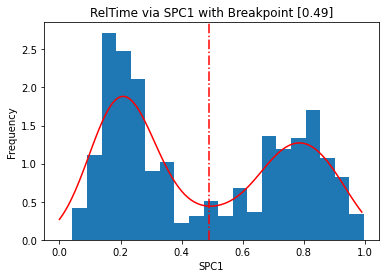

In [6]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


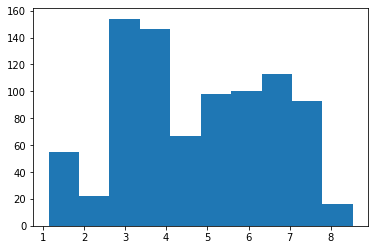

PolTerr


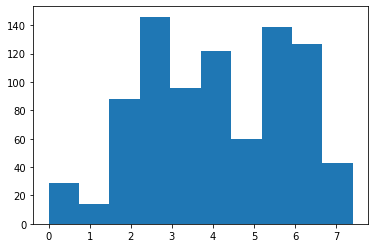

CapPop


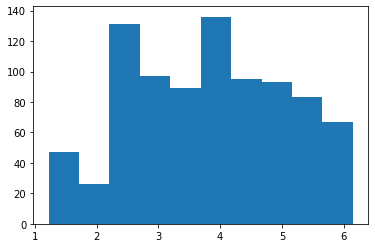

levels


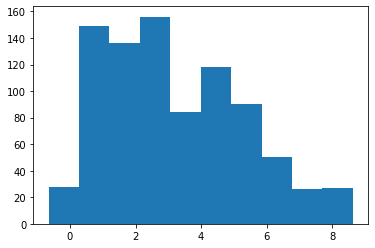

government


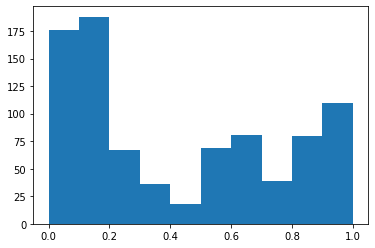

infrastr


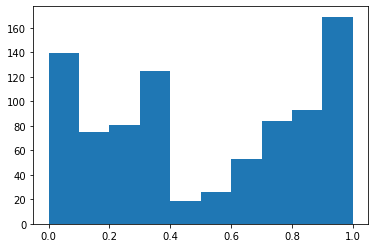

writing


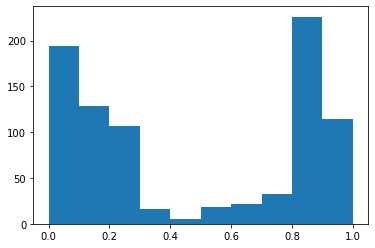

texts


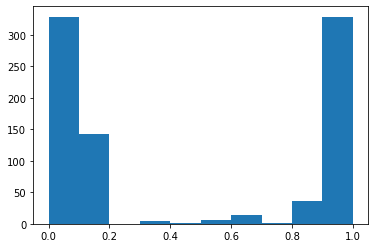

money


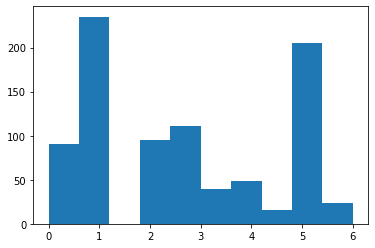

SPC1


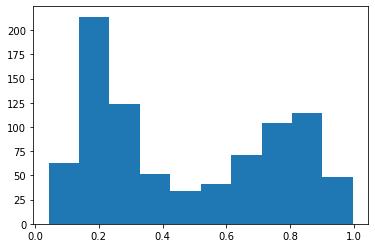

In [7]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [8]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [9]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [62]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []
SmallNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    else:
        SmallNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Lowland Andes large enough? [False]
Is Southern China Hills large enough? [False]
Is Finger Lakes large enough? [False]
Is Niger Inland Delta large enough? [ True]
Is Big Island Hawaii large enough? [False]
Is Garo Hills large enough? [False]
Is Cahokia large enough? [False]
Is Susiana large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Chuuk Islands large enough? [False]
Is Middle Yellow River Valley large enough? [ True]
Is Valley of Oaxaca large enough? [False]
Is Upper Egypt large enough? [ True]
Is Cuzco large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Yemeni Coastal Plain large enough? [ True]
Is Lena River Valley large enough? [False]
Is Orkhon Valley large enough? [ True]
Is Oro PNG large enough? [False]
Is Latium large enough? [ True]
Is North Colombia large enough? [False]
Is Iceland large enough? [ True]
Is Sogdiana large enough? [ True]
Is Kansai large enough? [ True]
Is Paris Basin large enough? [ True]
Is Cambodian Basin large enough? [ Tru

In [11]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [12]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Ghanaian Coast 1800
     Time      SPC1
122  -200  0.419548
123  -100  0.419548
124     0  0.623384
 ________________________ 
Kansai 400
     Time      SPC1
223  -700  0.232953
224  -600  0.232953
225  -500  0.232953
226  -400  0.232953
227  -300  0.232953
228  -200  0.232953
229  -100  0.474899
230     0  0.534591
231   100  0.581717
232   200  0.746241
233   300  0.763181
234   400  0.816839
235   500  0.818973
236   600  0.816803
237   700  0.818791
238   800  0.803606
239   900  0.802764
240  1000  0.819800
241  1100  0.746661
242  1200  0.824980
243  1300  0.923083
244  1400  0.924962
 ________________________ 
Paris Basin -200
     Time      SPC1
559 -3000  0.227195
560 -2900  0.227195
561 -2800  0.227195
562 -2700  0.227195
563 -2600  0.227195
564 -2500  0.227195
565 -2400  0.227195
566 -2300  0.227195
567 -2200  0.227195
568 -2100  0.227195
569 -2000  0.225325
570 -1900  0.225325
571 -1800  0.225325
572 -1700  0.225325
573 -1600  0.225325
574 -1500  0.225325
575 -1400  0.22532

C:\Users\Tobias\AppData\Local\Temp/ipykernel_7372/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_7372/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_7372/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [13]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Ghanaian Coast,Kansai,Paris Basin,Latium,Cambodian Basin,Middle Yellow River Valley,Upper Egypt,Central Java,Cuzco,Kachi Plain,Niger Inland Delta,Deccan,Iceland,Sogdiana,Yemeni Coastal Plain,Konya Plain,Orkhon Valley,Susiana
T0,1800,400,-200,-700,300,-1800,-3100,800,1400,-2500,1000,-300,1300,-500,400,-2000,500,-3700


In [14]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
122,Ghanaian Coast,GhAshnE,-200,6.020137,1.769219,4.519068,4.000000,0.172727,0.325000,0.333333,0.0000,3.000000,0.419548,1
123,Ghanaian Coast,GhAshnE,-100,6.020137,1.769219,4.519068,4.000000,0.172727,0.325000,0.333333,0.0000,3.000000,0.419548,1
124,Ghanaian Coast,GhAshnL,0,6.599660,5.796741,4.130334,5.333333,0.454545,0.408333,1.000000,0.3750,3.000000,0.623384,1
223,Kansai,JpYayoi,-700,3.344740,0.000000,3.125395,2.158344,0.144444,0.366667,0.150000,0.0000,4.000000,0.232953,0
224,Kansai,JpYayoi,-600,3.344740,0.000000,3.125395,2.158344,0.144444,0.366667,0.150000,0.0000,4.000000,0.232953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Susiana,IrIlkhn,5000,6.720159,6.579784,5.160659,5.501420,0.709091,0.987500,0.828571,1.0000,2.934952,0.818716,1
754,Susiana,UzTimur,5100,7.690196,6.740363,5.176091,6.115642,0.827273,0.881818,0.828571,0.9875,5.000000,0.872746,1
755,Susiana,IrAkKoy,5200,6.766649,6.255273,4.880255,5.092885,0.744444,0.850000,0.828571,0.9625,5.000000,0.812770,1
756,Susiana,IrSafvd,5300,6.954243,6.431364,5.301030,5.530021,0.809091,0.825000,0.842857,1.0000,5.000000,0.839888,1


## Comparison

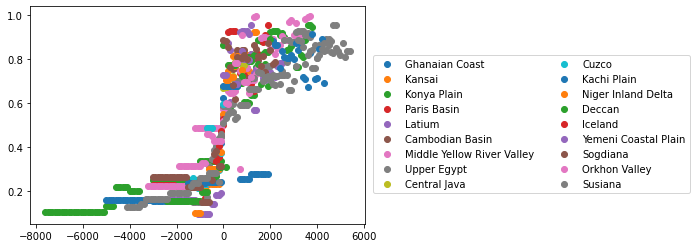

In [15]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

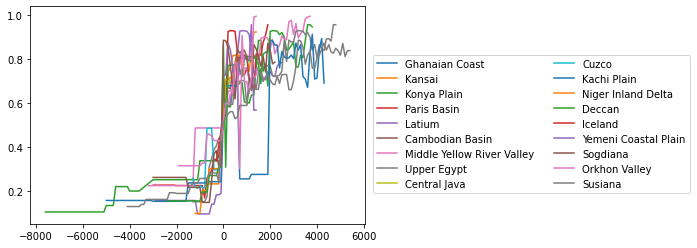

In [16]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [17]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

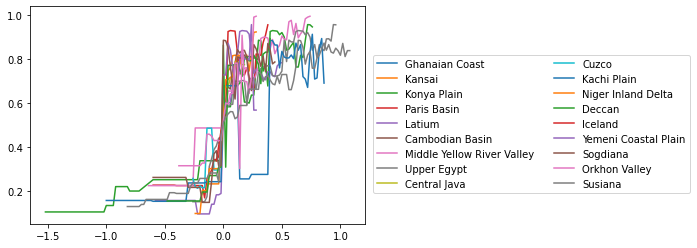

In [18]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [19]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [20]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641012e-01  1.93784867e-01  1.93749269e+01 -1.54321357e-02]


In [21]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.5916410115040487 0.19378486674520232 19.374926945605317 -0.015432135659801925
-1.52 1.2600000000000025


In [22]:
print(p0)


[ 5.91641012e-01  1.93784867e-01  1.93749269e+01 -1.54321357e-02]


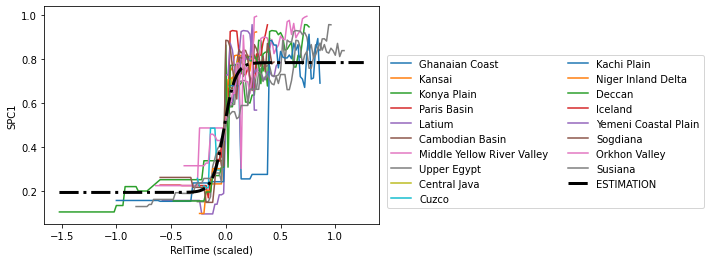

In [23]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

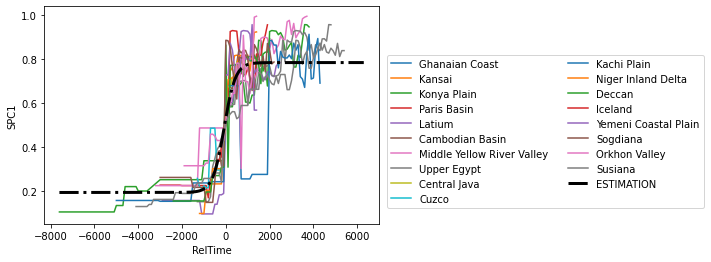

In [24]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [25]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y

In [26]:
RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583109689


In [27]:
def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

print("RhoSquared",RhoSq(y_hat = y_Residuals,
           y_true = y_est_Residuals))

RhoSquared 0.8186909043029651


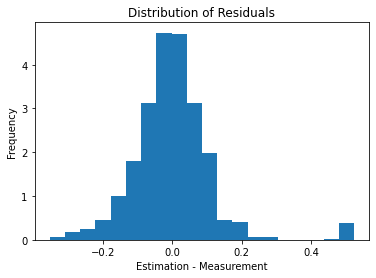

In [28]:
plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

In [29]:
len(N)

7

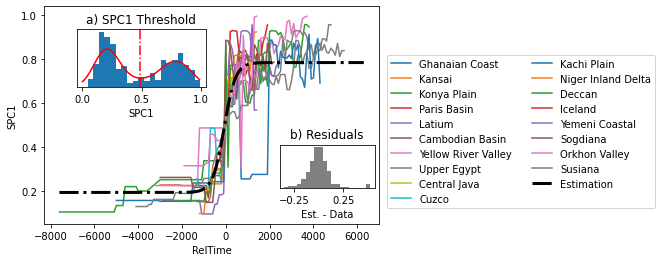

In [30]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.67, 0.25, 0.22, 0.15]
ax3 = fig.add_axes([left, bottom, width, height])

for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["SPC1"], label=name)
    #print(N)
    
ax1.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["SPC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


ax3.set_title("b) Residuals")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)

#plt.savefig("Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

## Out-of-Sample prediction

In [31]:
L = len(Data_RT["RelTime"].to_numpy())


In [32]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [33]:
X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

for i in range(5):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    print((a1_, b1_, c1_, d1_))
    print(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

(0.5937461445138068, 0.18974971567901885, 19.76559699355094, -0.015687327987384928)
0.8489007759257948
(0.5843336153973046, 0.19524813811069666, 21.293760025686883, -0.014031336798323956)
0.8434465701402891
(0.5943406457871571, 0.19354485733628563, 18.41078225433147, -0.017776390395181228)
0.8524959285557234
(0.5972573310685652, 0.19255556311605365, 18.471221487035923, -0.015474845564020463)
0.8672706817672224
(0.5932612503347182, 0.19586549768919578, 18.74643044129433, -0.015755861812925293)
0.8301380753126274


In [34]:
opt.curve_fit(f, X_train, y_train)[0]

array([ 5.93261250e-01,  1.95865498e-01,  1.87464304e+01, -1.57558618e-02])

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [35]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [36]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.6332033727507553 0.17476828092625574 11.864818322579234 -0.009709132794333364
-----------------
0.5280482933392943 0.19813537625334612 36.924202266742846 -0.014523650367292355
-----------------
0.7065704873043754 0.1439914126993018 5.911488313569586 0.014424848855832572
-----------------
0.671355733839734 0.17893768700269785 8.969322799056725 -0.03050319816484268
-----------------
0.6508041391706002 0.17850462105259038 13.746425843557253 -0.01799585518127727
-----------------
0.6067195506924514 0.1909278454113663 24.505524664704456 -0.010911611420666368
-----------------
0.5681531414199003 0.21728411219856195 28.76660270685401 -0.01756250904559539
-----------------
0.6377359931495197 0.19571550167747623 15.293865339880742 -0.008053760972421617
-----------------
0.6027802310471396 0.20735207963314028 19.711739252998793 -0.009067748963121213
-----------------
0.6356123587706292 0.16618749003945313 12.34195988769807 -0.016715242908912555
-----------------
0.5880962218927611 0.1957092096

0.6340447449943863 0.16690906541181555 10.855361337509196 -0.006891537275140087
-----------------
0.4984980569138126 0.22323824863344974 122.86364666440157 -0.013767614748319716
-----------------
0.6886175656367131 0.16589076521990678 8.20825599475568 -0.01627344496354964
-----------------
0.6430216568298323 0.17346297464481975 10.90762571705887 -0.008345632281281592
-----------------
0.667416017895844 0.15224877157753308 7.120939438342847 0.0012899044571092855
-----------------
0.6837921258996961 0.1557736120703456 7.894221233742077 -0.001732742726601603
-----------------
0.5467442860089307 0.19721428027942245 53.77820230511396 -0.017584138577693913
-----------------
0.6054784055154306 0.20607672295376672 15.621904568010278 -0.021371910401493163
-----------------
0.6035703196363686 0.19779648765475213 12.198738625445573 -0.01645998723069769
-----------------
0.6059196594137811 0.19569231316950378 25.940472955535054 -0.011284895167796509
-----------------
0.5598661832322295 0.191152929

0.5810705038548046 0.18889566095887586 25.74712030883021 -0.013119179204873618
-----------------
0.6705010703918148 0.1598581294354899 7.159217007027502 -0.0007215745338550335
-----------------
0.6100191360929592 0.19600227839691786 21.237873962925566 -0.012476875696087833
-----------------
0.592168679534265 0.18029695693091766 18.399299834452275 -0.011070850023993389
-----------------
0.5831218362650966 0.19067574338037527 29.595974324302404 -0.02065227940292406
-----------------
0.5782692738719515 0.1776319136660666 35.533043991280415 -0.017529225976590193
-----------------
0.5637258698605766 0.20515053686795123 37.94726977809005 -0.015576590691275235
-----------------
0.6002079810406437 0.18119226121587245 22.099878049310718 -0.012107729041231119
-----------------
0.5749308799258404 0.1834398123408631 34.856482989111754 -0.01532432554165253
-----------------
0.577276023168203 0.19020516832452666 18.438997641312348 -0.019814930698931185
-----------------
0.5730466336847753 0.20841710

0.578277359768363 0.21266111979797692 26.436187723842565 -0.012042917735133746
-----------------
0.7296160560123396 0.13193091317550346 5.22058625393834 0.04607221235185201
-----------------
0.5858522400566365 0.21177171693607375 26.623704765673693 -0.010781804849334562
-----------------
0.5872667396185932 0.20574482487976067 31.499691446329102 -0.010626832686121065
-----------------
0.5981586006858975 0.17921813100513134 25.878472654200927 -0.015215489849366102
-----------------
0.6458252200771909 0.17528272977249065 11.080927025163405 -0.02016505010017305
-----------------
0.5705310609474374 0.19156387109343845 23.49441876847681 -0.021487440730120398
-----------------
0.6803784247121412 0.1909449690908925 10.193377294260745 -0.009494950143530793
-----------------
0.6138686159738685 0.1609980712949138 15.188081881675467 -0.009448987551519383
-----------------
0.6187419245564564 0.1960472069504437 9.7914696373026 -0.014964918755192944
-----------------
0.5866152606897888 0.212166225634

0.608567405000812 0.18103320888623817 15.769930806873427 -0.01529707422747631
-----------------
0.6095453155814852 0.18329129315447554 23.205508970645116 -0.016392056102967876
-----------------
0.5973216386182302 0.2065764559797799 29.868269115755155 -0.009561468232559298
-----------------
0.6452468152368601 0.17352858566778445 21.700351106382904 -0.008362182343515665
-----------------
0.6741918735828298 0.1616745392843097 8.795069434516435 0.0023037772891311955
-----------------
0.6696736817032408 0.1605360890077728 8.189068881899225 -0.004692059524667222
-----------------
0.6418718313352987 0.19502672835848348 15.138856989471961 -0.010354930365205696
-----------------
0.5266786792608364 0.2141166751034972 46.89738129507342 -0.011586549103259203
-----------------
0.6485332951987492 0.1734758890770364 10.560638840090588 -0.009617169532836534
-----------------
0.5938004315914812 0.1889428868996104 22.083222623555613 -0.018065376137936767
-----------------
0.578739520484146 0.20543837414

0.6349655504124239 0.1784863490711579 11.651898335407326 -0.015840376975127666
-----------------
0.5288252033206388 0.2159154019310543 40.98736592110885 -0.019888536283142733
-----------------
0.5990956009497924 0.22897981011810434 13.877402257023377 -0.005261766141068553
-----------------
0.5367653822344873 0.18962607420526342 44.6785527875668 -0.01602097919020886
-----------------
0.5694747525961438 0.205130898266253 30.14462176923332 -0.016721989133270724
-----------------
0.6158596825423781 0.19114264707121936 12.962117893609992 -0.013855152467902702
-----------------
0.6326103569989029 0.18148854926724384 11.624836100497188 -0.013666520162217385
-----------------
0.6377979020843836 0.16550784245328595 10.357602669205267 -0.025804901227943815
-----------------
0.6269035335315237 0.1835414128504096 14.43328017976005 -0.013140702709478936
-----------------
0.6974086978634346 0.15651701701664134 6.553844060001441 -0.007254071683143839
-----------------
0.5812485361871268 0.20442205397

0.5638159528529354 0.19526704600989148 25.747003610474756 -0.01683426353079933
-----------------
0.5581593592586014 0.21732051709729866 24.051903990758316 -0.014759254119918451
-----------------
0.563575302820082 0.18715233134479728 29.833150211834493 -0.021776838727143574
-----------------
0.705372796430107 0.1678279378032161 8.176479438851262 -0.00555789634754807
-----------------
0.5417795167783118 0.22646861216233732 27.20662617979769 -0.018306827134041876
-----------------
0.6282958720405983 0.1689308214291391 10.167790654689856 -0.016087166835929673
-----------------
0.6060217821285484 0.19862852142123696 22.24234456758981 -0.007166287012564458
-----------------
0.6281717774918533 0.17390660853452794 12.868837015502647 -0.01666490914786745
-----------------
0.5499644600633216 0.21184298961104633 21.06692378337917 -0.026515176927412336
-----------------
0.6448674926245529 0.18184849865443295 10.865290201839702 -0.010694493395659145
-----------------
0.5513672841700348 0.2037814838

0.6325136482363266 0.18220565759508447 15.236465686380413 -0.012197722840922062
-----------------
0.58947236386204 0.1954115962561473 15.90188608318167 -0.014213052550416608
-----------------
0.6001289320103012 0.19377234440990676 15.494894357142282 -0.010883731038870886
-----------------
0.6325023148992527 0.16975742082105422 10.791031385315295 -0.0070425897571412465
-----------------
0.5504898373202002 0.2200438470700461 30.72553488248628 -0.020422062765617862
-----------------
0.6683584968929033 0.1439820535762738 6.3793700971698355 0.009493514295267425
-----------------
0.5693433651074815 0.2102870277812386 41.10248739062946 -0.010683546239008291
-----------------
0.5663195948202395 0.19751179912611813 17.43733137258767 -0.026005768508307145
-----------------
0.6454496264204733 0.1765333759904365 12.15982938021685 -0.009529457958471323
-----------------
0.6230384644971867 0.17552319402857883 12.052175435579327 -0.012631471077041885
-----------------
0.5886667507985379 0.20512947430

0.6616454139803778 0.14575949752400746 7.112496715856106 0.0024224593779548164
-----------------
0.6235419982202641 0.16607395040763262 10.182248159475405 -0.018610061274754935
-----------------
0.6045721827852665 0.17371340803023552 13.491469793166535 -0.02372346788885235
-----------------
0.5861060052841383 0.18649989547674223 19.417985888238203 -0.012696908933989734
-----------------
0.6173517126184997 0.18881505809560245 19.401569407867875 -0.013608234098847895
-----------------
0.6425413274551245 0.16476716400792651 8.255554832311336 -0.015688503750598146
-----------------
0.5720485446583571 0.19883958514588665 28.30364130659867 -0.012759759779744759
-----------------
0.6064066558977269 0.1872355348667829 17.053165065320535 -0.0057080135702002625
-----------------
0.5840724216343847 0.21598169627590608 21.5494697534337 -0.005537681912525384
-----------------
0.6358379361085627 0.17299114540661772 9.748085999007616 -0.02541275573098215
-----------------
0.6012739286432089 0.2272926

0.597955529216266 0.17231410907891376 29.301290019785263 -0.009995444890485301
-----------------
0.5578589419272628 0.1914346893796833 30.34007776090924 -0.018809873104823002
-----------------
0.5798681461041792 0.1871844368613278 35.42501351167228 -0.01204459628487707
-----------------
0.6225859937443388 0.19252746694400327 15.971175126164985 -0.019326041957286037
-----------------
0.5666572028335121 0.22183149535867924 28.56850874641703 -0.012095472146329412
-----------------
0.6233587444509038 0.17977847693748594 13.548796776457989 -0.021912694190605438
-----------------
0.6078086124503219 0.19464486362839517 20.533447183649926 -0.012345349313017917
-----------------
0.6789392081186728 0.17115726407152557 7.679101458631305 -0.006399362729067171
-----------------
0.6273533493586158 0.1858327560551381 13.452521354536959 -0.01327974840934186
-----------------
0.677025586351413 0.16090033052235056 8.632744378623574 -0.009684898405217222
-----------------
0.6581145819522299 0.15742728382

0.6131183188169262 0.19886325103103633 17.09474502619294 -0.014273234987984646
-----------------
0.538099617713111 0.18976988638077197 27.826798399599745 -0.027652085345081408
-----------------
0.5424557868929832 0.21307447892822406 44.63207826447819 -0.015044877201464506
-----------------
0.6660636078109864 0.16430843577734214 8.511918590835368 -0.015483482047675324
-----------------
0.6464139970045334 0.16649352866357348 9.05333721039 -0.016310741494008574
-----------------
0.5976090646578154 0.1890546767699434 26.884140127147248 -0.010552616927841397
-----------------
0.6509661573585399 0.16604911665252156 7.931039775615635 -0.0065080239861713875
-----------------
0.6110729720096362 0.19606383977729624 15.58103348806613 -0.009937477967602065
-----------------
0.6318877133684214 0.16649095534129102 10.351887224614336 -0.027378682234436343
-----------------
0.568234553922661 0.20311328591237987 38.07274595353376 -0.011264959138894396
-----------------
0.6098465918581641 0.196167838611

0.6480788290002816 0.15977421991919102 8.183623875292314 -0.010369113860040092
-----------------
0.6172404076821044 0.18438782866215964 17.433589806223196 -0.01313774431160957
-----------------
0.603421183236752 0.1719795342271153 10.367432409209709 -0.012925079724278189
-----------------
0.6066905876608604 0.1981898053406201 13.66029869648876 -0.015611324847855762
-----------------
0.5955263001643548 0.19423187358381952 24.11942714443667 -0.01130998026413778
-----------------
0.59128772695766 0.18754640072487735 25.639849186320614 -0.01707009555704766
-----------------
0.5440667465488354 0.20422504887966694 25.385504820090407 -0.02293367511314482
-----------------
0.6104996964992871 0.17807680566708806 16.034614784197114 -0.015062801377496405
-----------------
0.5719278231781892 0.20674236411394384 22.380196688401764 -0.020427640105120423
-----------------
0.6360909536471228 0.16533914339741046 9.203404029326432 -0.015639042121402602
-----------------
0.5850413428059542 0.199572489714

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [37]:
print(negCcount)

0


In [38]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

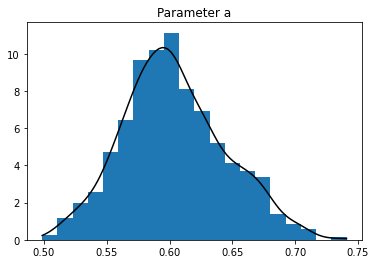

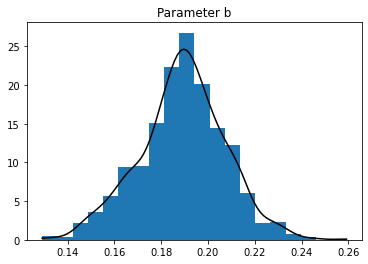

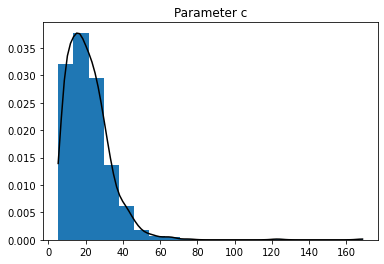

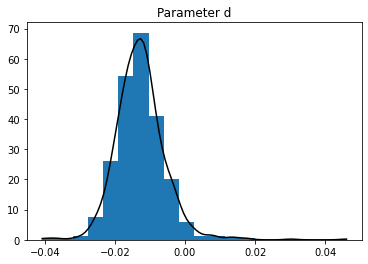

In [39]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [40]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.18907528467346527 0.018288128337943275
0.7925183174139627 0.03045049382435926
0.20736341301140854 0.7620678235896035
0.19378486674533174 0.7854258778906364


In [41]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [42]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_7372/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [43]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1792.0 years.


In [44]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [45]:
print(np.quantile(Params["d"],0.975))


0.0014249470018233047


In [46]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-57.07424753385782, 0.0)

##### Bootstrap for the Time Interval

In [47]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [48]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.6332033727507553 0.17476828092625574 11.864818322579234 -0.009709132794333364     fjac: array([[-1.]])
     fun: array([1.11022302e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.00110317e-10])
       r: array([-0.36682956])
  status: 1
 success: True
       x: array([-0.25529064])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.55431223e-14])
       r: array([-0.50515713])
  status: 1
 success: True
       x: array([0.20512656])
-----------------
0.7065704873043754 0.1439914126993018 5.911488313569586 0.014424848855832572     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.11700143e-12])
       r: array([-0.34102322])
  status: 1
 success: True
       x: array([-0.37759677])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.0358385e-12])
     

0.6239213504126716 0.1793063070425349 16.7436256083001 -0.01194964647422888     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.06619183e-14])
       r: array([-0.44865227])
  status: 1
 success: True
       x: array([-0.19445319])     fjac: array([[-1.]])
     fun: array([-4.4408921e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.29034697e-10])
       r: array([-0.64369432])
  status: 1
 success: True
       x: array([0.14633836])
-----------------
0.616494304057544 0.18007621235016047 14.492629575027463 -0.039169651022405175     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.60342916e-15])
       r: array([-0.37795936])
  status: 1
 success: True
       x: array([-0.2511643])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.85198556e-13])
       r: array([-0.

0.5760244133890923 0.19374393489446026 23.468703885509797 -0.011257635715019832     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.82659476e-11])
       r: array([-0.31207543])
  status: 1
 success: True
       x: array([-0.16979733])     fjac: array([[-1.]])
     fun: array([-1.11022302e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.06216591e-10])
       r: array([-0.17830706])
  status: 1
 success: True
       x: array([0.17202488])
-----------------
0.5939055213225439 0.19178062771293167 20.053992745873238 -0.014001383526522549     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.2677307e-13])
       r: array([-0.30429789])
  status: 1
 success: True
       x: array([-0.19421314])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.18474152e-13])
       r: arra

0.6024416318219695 0.1812132518703333 16.78583123686975 -0.020146364050810762     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.59039448e-13])
       r: array([-0.41989858])
  status: 1
 success: True
       x: array([-0.20439451])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.00940375e-11])
       r: array([-0.34937317])
  status: 1
 success: True
       x: array([0.17599563])
-----------------
0.5741312314136675 0.20246711428541178 41.70305843556113 -0.014174388281556939     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-7.80375764e-13])
       r: array([-0.20244913])
  status: 1
 success: True
       x: array([-0.12821431])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([7.83817455e-14])
       r: array([-0.5906309

C:\Users\Tobias\AppData\Local\Temp/ipykernel_7372/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0.667416017895844 0.15224877157753308 7.120939438342847 0.0012899044571092855     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.31337172e-12])
       r: array([-0.36005843])
  status: 1
 success: True
       x: array([-0.33684093])     fjac: array([[-1.]])
     fun: array([-2.22044605e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.06077394e-10])
       r: array([-0.37475173])
  status: 1
 success: True
       x: array([0.33266365])
-----------------
0.6837921258996961 0.1557736120703456 7.894221233742077 -0.001732742726601603     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.57984736e-12])
       r: array([-0.37653489])
  status: 1
 success: True
       x: array([-0.31916564])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.98618899e-13])
       r: array([

       x: array([0.13363283])
-----------------
0.5738230552714577 0.1983200414317162 43.07895767393256 -0.01578050932844936     fjac: array([[-1.]])
     fun: array([-1.55431223e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.48772633e-10])
       r: array([-0.38343534])
  status: 1
 success: True
       x: array([-0.1117532])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-1.63868918e-13])
       r: array([-0.4264114])
  status: 1
 success: True
       x: array([0.0776415])
-----------------
0.5980349178172213 0.18699378395961538 16.07457307854951 -0.019584216229324675     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.55236934e-13])
       r: array([-0.31628044])
  status: 1
 success: True
       x: array([-0.2276737])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
  

0.5846690950797363 0.1939619098531094 21.21804136084229 -0.019166243865851286     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.8129942e-13])
       r: array([-0.27783587])
  status: 1
 success: True
       x: array([-0.19602003])     fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-7.83206833e-11])
       r: array([-0.34148008])
  status: 1
 success: True
       x: array([0.14744318])
-----------------
0.5654581490059369 0.2027012864983843 23.351957282690897 -0.02179752374530889     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.08192924e-12])
       r: array([-0.10797235])
  status: 1
 success: True
       x: array([-0.22691462])     fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([7.43312079e-11])
       r: array([

0.6598791204215907 0.19514915408962838 10.52676424674899 -0.005260001071861106     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.66731082e-14])
       r: array([-0.1261967])
  status: 1
 success: True
       x: array([-0.38246702])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.00817166e-11])
       r: array([-0.84071713])
  status: 1
 success: True
       x: array([0.16649664])
-----------------
0.5793727081043933 0.19072236139286375 18.232021457505386 -0.02058974747099564     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.02310391e-13])
       r: array([-0.29468562])
  status: 1
 success: True
       x: array([-0.21370768])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.24185123e-14])
       r: array([-0.14432519])
  status

0.6122314641260924 0.19744959101899384 23.52447326288304 -0.005000444022077457     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.93846605e-11])
       r: array([-0.22944037])
  status: 1
 success: True
       x: array([-0.17957842])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-8.16458012e-13])
       r: array([-1.03296775])
  status: 1
 success: True
       x: array([0.10012578])
-----------------
0.5881441403555197 0.20561203133397643 26.534386465689714 -0.013091313270201287     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.13478149e-15])
       r: array([-0.04633346])
  status: 1
 success: True
       x: array([-0.23218757])     fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.05490949e-10])


0.5626984064567071 0.20496743818859128 24.147911490514847 -0.02588747391886971     fjac: array([[-1.]])
     fun: array([8.60422844e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.38580577e-11])
       r: array([-0.0576122])
  status: 1
 success: True
       x: array([-0.25177395])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.0936807e-12])
       r: array([-0.13383576])
  status: 1
 success: True
       x: array([0.16461895])
-----------------
0.6742805569360919 0.17780086523919597 8.380345709928777 -0.013399173788650347     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.10444986e-12])
       r: array([-0.23688254])
  status: 1
 success: True
       x: array([-0.3812008])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.28836941e-11])
    

0.6747492522239902 0.1507012103491877 6.709372167070083 0.00743251417532021     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.49148488e-12])
       r: array([-0.34824324])
  status: 1
 success: True
       x: array([-0.34871436])     fjac: array([[-1.]])
     fun: array([-1.11022302e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.80954371e-10])
       r: array([-0.38531267])
  status: 1
 success: True
       x: array([0.34524457])
-----------------
0.6357610534403311 0.17889357820150714 11.93304036673499 -0.007410717813307238     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.42503803e-14])
       r: array([-0.32451827])
  status: 1
 success: True
       x: array([-0.26385528])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.92239616e-11])
       r: array([

0.6803784247121412 0.1909449690908925 10.193377294260745 -0.009494950143530793     fjac: array([[-1.]])
     fun: array([6.38378239e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.09859372e-10])
       r: array([-0.16332172])
  status: 1
 success: True
       x: array([-0.37245773])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([6.34677866e-11])
       r: array([-0.93484889])
  status: 1
 success: True
       x: array([0.15275888])
-----------------
0.6138686159738685 0.1609980712949138 15.188081881675467 -0.009448987551519383     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.55153668e-14])
       r: array([-0.65101249])
  status: 1
 success: True
       x: array([-0.17436081])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.4996229e-12])
   

0.6287432969145962 0.17890954650500965 17.605347071121138 -0.007999375231008968     fjac: array([[-1.]])
     fun: array([-6.88338275e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.82155102e-10])
       r: array([-0.4782757])
  status: 1
 success: True
       x: array([-0.18119266])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.77156117e-15])
       r: array([-0.74435446])
  status: 1
 success: True
       x: array([0.13677934])
-----------------
0.6813863922260024 0.1786020021133529 8.034213336783152 -0.009117535438254297     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.77764486e-12])
       r: array([-0.2213217])
  status: 1
 success: True
       x: array([-0.3977017])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.0468737e-11])
       r: array([-0.67365796])

0.6919898510500221 0.1781990171291271 9.176772256175521 -0.0090069818862862     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.44244682e-14])
       r: array([-0.25635537])
  status: 1
 success: True
       x: array([-0.34938407])     fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.85914847e-10])
       r: array([-0.83717609])
  status: 1
 success: True
       x: array([0.17476405])
-----------------
0.6241521323274298 0.1915969630078186 21.040925605216707 -0.009668276052696472     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([8.21842594e-14])
       r: array([-0.32336071])
  status: 1
 success: True
       x: array([-0.18327874])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.61090063e-11])
    

0.6065304696673723 0.17947992018677647 20.117579692320717 -0.016503684294575886     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.71727085e-14])
       r: array([-0.5351604])
  status: 1
 success: True
       x: array([-0.16725033])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.25734986e-11])
       r: array([-0.46265221])
  status: 1
 success: True
       x: array([0.14215468])
-----------------
0.5979490728597384 0.17443846089406556 22.76361822630636 -0.011930433802001756     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([8.78319639e-12])
       r: array([-0.70822119])
  status: 1
 success: True
       x: array([-0.13680679])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.75537362e-12])
       r: array([-0.2308598

0.5938004315914812 0.1889428868996104 22.083222623555613 -0.018065376137936767     fjac: array([[-1.]])
     fun: array([2.3869795e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.66599409e-10])
       r: array([-0.39416203])
  status: 1
 success: True
       x: array([-0.17391061])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.28678179e-11])
       r: array([-0.44068448])
  status: 1
 success: True
       x: array([0.13237257])
-----------------
0.578739520484146 0.20543837414720229 23.448075907134935 -0.016382980799759278     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.85049762e-14])
       r: array([-0.04498832])
  status: 1
 success: True
       x: array([-0.25958309])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.80246962e-12])
       r: array([-0.4986319

0.5609764497247832 0.20186641067098346 22.188584956220858 -0.02569243604921556     fjac: array([[-1.]])
     fun: array([1.36002321e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.13554721e-10])
       r: array([-0.12077698])
  status: 1
 success: True
       x: array([-0.2337106])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.04916076e-12])
       r: array([-0.01717325])
  status: 1
 success: True
       x: array([0.27099801])
-----------------
0.5742636560556641 0.2010746978555715 23.709388585016555 -0.010491403755305198     fjac: array([[-1.]])
     fun: array([-1.94289029e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.64765757e-10])
       r: array([-0.14746706])
  status: 1
 success: True
       x: array([-0.20042969])     fjac: array([[-1.]])
     fun: array([-1.11022302e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.2023

0.5998537074021396 0.18457315867549284 16.752184759061564 -0.014496899605171606     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([1.59513514e-11])
       r: array([-0.36728057])
  status: 1
 success: True
       x: array([-0.20740423])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.59963212e-11])
       r: array([-0.36060282])
  status: 1
 success: True
       x: array([0.1795953])
-----------------
0.6222371013412639 0.17379555124939286 23.899448772068084 -0.011252142622663237     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.3405943e-14])
       r: array([-0.75897417])
  status: 1
 success: True
       x: array([-0.1310999])     fjac: array([[-1.]])
     fun: array([1.33226763e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.37013409e-10])
   

0.6436190546361409 0.167826618191044 10.160589450784762 -0.002559509642189897     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.60342916e-15])
       r: array([-0.37704012])
  status: 1
 success: True
       x: array([-0.27089814])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.43165513e-12])
       r: array([-0.46321768])
  status: 1
 success: True
       x: array([0.24228685])
-----------------
0.6664885217377235 0.16084611071843224 7.479077963174712 -0.0025778498470741484     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.88815646e-11])
       r: array([-0.32362501])
  status: 1
 success: True
       x: array([-0.34885699])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.51634261e-11])
       r: array([-0.44033449

0.5812485361871268 0.20442205397875834 20.85483998991837 -0.015589146295926583     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.36973766e-13])
       r: array([-0.06103117])
  status: 1
 success: True
       x: array([-0.26882693])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.04281037e-13])
       r: array([-0.47224389])
  status: 1
 success: True
       x: array([0.1360476])
-----------------
0.6427855973589394 0.1921906999902114 14.150297361889693 -0.004901927664608423     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.00438016e-12])
       r: array([-0.20963068])
  status: 1
 success: True
       x: array([-0.2679653])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([6.46027676e-12])
       r: array([-0.91465755

0.5746372115691986 0.18887057634456783 30.5736934512293 -0.018762618985969037     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-7.47107654e-11])
       r: array([-0.54719649])
  status: 1
 success: True
       x: array([-0.13008854])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.47515333e-12])
       r: array([-0.04391478])
  status: 1
 success: True
       x: array([0.17704662])
-----------------
0.6229631461641267 0.18827407225074017 17.66565332602217 -0.0050296853571156555     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.89596125e-11])
       r: array([-0.3268915])
  status: 1
 success: True
       x: array([-0.20056364])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.0658141e-13])
       r: arra

0.5782421340938926 0.18767782999494245 19.26190409608521 -0.01879184980838456     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.42985623e-12])
       r: array([-0.36627314])
  status: 1
 success: True
       x: array([-0.19247506])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.08721929e-14])
       r: array([-0.07370525])
  status: 1
 success: True
       x: array([0.24103083])
-----------------
0.6066652396588575 0.2025420385331333 18.42532606198914 -0.020872837608208974     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.49733004e-12])
       r: array([-0.08812947])
  status: 1
 success: True
       x: array([-0.2828459])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.60058641e-12])
       r: array([-0.80107026])
  status: 

0.6048539776479945 0.1921974146380296 35.0486068173924 -0.011726504406065706     fjac: array([[-1.]])
     fun: array([4.69069228e-15])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([4.02749112e-10])
       r: array([-0.51821319])
  status: 1
 success: True
       x: array([-0.11616825])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([2.68818301e-12])
       r: array([-1.15520824])
  status: 1
 success: True
       x: array([0.06789237])
-----------------
0.5741326113657004 0.19550823990900984 27.708277988092725 -0.01307516356356265     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.20792265e-12])
       r: array([-0.32170375])
  status: 1
 success: True
       x: array([-0.15235596])     fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.18107804e-11])
     

0.5655334913154301 0.20354850268476915 32.696108146094176 -0.013270120716524185     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([5.0820459e-13])
       r: array([-0.12389125])
  status: 1
 success: True
       x: array([-0.16595141])     fjac: array([[-1.]])
     fun: array([8.8817842e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.56137391e-11])
       r: array([-0.22649359])
  status: 1
 success: True
       x: array([0.12060993])
-----------------
0.6232459367669746 0.19261461810502783 20.564480201349184 -0.010759666912131127     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.63344379e-12])
       r: array([-0.29612417])
  status: 1
 success: True
       x: array([-0.19164587])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.05080389e-11])
       r: ar

0.5917133816637681 0.18062764684509974 27.31763873227734 -0.011224672980757619     fjac: array([[-1.]])
     fun: array([1.99840144e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([4.29230596e-10])
       r: array([-0.6973545])
  status: 1
 success: True
       x: array([-0.12290284])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.87045951e-12])
       r: array([-0.27576757])
  status: 1
 success: True
       x: array([0.13651756])
-----------------
0.5912807066848016 0.19306884514603692 27.335562220208907 -0.012329799453129616     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([8.04911693e-15])
       r: array([-0.38130342])
  status: 1
 success: True
       x: array([-0.14760921])     fjac: array([[-1.]])
     fun: array([7.77156117e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.26011535e-10])
  

0.6040808238980939 0.18039256722388702 12.561610276338978 -0.014575659791138396     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.25455202e-14])
       r: array([-0.32367073])
  status: 1
 success: True
       x: array([-0.25843582])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.04281037e-14])
       r: array([-0.27101095])
  status: 1
 success: True
       x: array([0.24467477])
-----------------
0.595391553210796 0.19515654522024092 16.313958683111483 -0.012053510504384508     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.80449014e-14])
       r: array([-0.19505948])
  status: 1
 success: True
       x: array([-0.24905946])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.30162547e-12])
       r: arr

0.6454496264204733 0.1765333759904365 12.15982938021685 -0.009529457958471323     fjac: array([[-1.]])
     fun: array([2.30371278e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.06035863e-10])
       r: array([-0.35698407])
  status: 1
 success: True
       x: array([-0.25562782])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.68403094e-13])
       r: array([-0.6609285])
  status: 1
 success: True
       x: array([0.17793988])
-----------------
0.6230384644971867 0.17552319402857883 12.052175435579327 -0.012631471077041885     fjac: array([[-1.]])
     fun: array([1.33226763e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.21793667e-10])
       r: array([-0.36413497])
  status: 1
 success: True
       x: array([-0.2550293])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.24456001e-12])
       r: array([-

0.6095429766427278 0.16206198730912155 13.378308583437251 -0.016976963421234215     fjac: array([[-1.]])
     fun: array([2.91433544e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([3.43901574e-10])
       r: array([-0.56100942])
  status: 1
 success: True
       x: array([-0.20550184])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.67532654e-13])
       r: array([-0.12559449])
  status: 1
 success: True
       x: array([0.29260968])
-----------------
0.6215711236037441 0.17151312288363885 15.58017423017993 -0.010971500292698614     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.28546088e-13])
       r: array([-0.52633818])
  status: 1
 success: True
       x: array([-0.19026934])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.96361816e-11])
       r: array(

0.6273904608331766 0.1815717912076217 13.326931403412688 -0.011885188672777882     fjac: array([[-1.]])
     fun: array([5.82867088e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.22663574e-10])
       r: array([-0.32959452])
  status: 1
 success: True
       x: array([-0.24821425])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.27031718e-12])
       r: array([-0.57824627])
  status: 1
 success: True
       x: array([0.17690426])
-----------------
0.5987995837453575 0.17917907250217024 28.546246717814515 -0.00978989274905425     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.57434066e-11])
       r: array([-0.76668719])
  status: 1
 success: True
       x: array([-0.11516097])     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.13149601e-10])


0.6077850385940713 0.18816043308448707 24.091370730509063 -0.017052043941478315     fjac: array([[-1.]])
     fun: array([-6.10622664e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-4.56117338e-10])
       r: array([-0.44800342])
  status: 1
 success: True
       x: array([-0.15912162])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([4.45151693e-11])
       r: array([-0.77066495])
  status: 1
 success: True
       x: array([0.10040547])
-----------------
0.6234234127427729 0.1877788332014615 19.124154236115267 -0.009594446477450369     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.04281869e-11])
       r: array([-0.36277325])
  status: 1
 success: True
       x: array([-0.18887374])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.28119737e-13])

       x: array([0.25419676])
-----------------
0.6137442033477651 0.18495231689204206 21.48483158419519 -0.011867412912744322     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.0341373e-10])
       r: array([-0.46391953])
  status: 1
 success: True
       x: array([-0.16419922])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.89692706e-11])
       r: array([-0.73999413])
  status: 1
 success: True
       x: array([0.11646547])
-----------------
0.6367845893832861 0.17964521391923102 14.2038423180249 -0.002580701847064988     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.24062444e-11])
       r: array([-0.37656821])
  status: 1
 success: True
       x: array([-0.22011607])     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution 

0.5855595497522982 0.20563787495019442 18.190799542464006 -0.02076864547786828     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-9.43689571e-15])
       r: array([-0.03129642])
  status: 1
 success: True
       x: array([-0.34093477])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.35087505e-11])
       r: array([-0.50352981])
  status: 1
 success: True
       x: array([0.1413895])
-----------------
0.6834466132351552 0.17366597812639145 9.088758417209993 -0.00940381994990669     fjac: array([[-1.]])
     fun: array([3.08086889e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.95342759e-10])
       r: array([-0.29116952])
  status: 1
 success: True
       x: array([-0.33498896])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.11670698e-13])
       r: array([-0.74370763]

0.5959355725071919 0.19290102264346684 15.052425765500207 -0.013059619709130497     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.98212582e-13])
       r: array([-0.21241102])
  status: 1
 success: True
       x: array([-0.25846946])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.88098492e-15])
       r: array([-0.38483554])
  status: 1
 success: True
       x: array([0.19002642])
-----------------
0.5875512730303889 0.19365296376555924 26.222958964386034 -0.01226792897063635     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.63730141e-13])
       r: array([-0.35113894])
  status: 1
 success: True
       x: array([-0.15466962])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.44009282e-14])
       r: array([-0.48546942])
  statu

0.6147006720901564 0.1840945368959947 14.834598850608913 -0.02020110022811094     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.39866452e-11])
       r: array([-0.33211828])
  status: 1
 success: True
       x: array([-0.23830135])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([9.32587341e-15])
       r: array([-0.51228299])
  status: 1
 success: True
       x: array([0.16558114])
-----------------
0.6001010099613576 0.1968562986795151 41.12635314879721 -0.013158764753602713     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-4.43084458e-12])
       r: array([-0.42455289])
  status: 1
 success: True
       x: array([-0.11108579])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.84297022e-13])
       r: array([-1.3514545

0.5859600917162978 0.18514889489963246 20.499410265767384 -0.013526627980670268     fjac: array([[-1.]])
     fun: array([1.69309011e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.33295328e-10])
       r: array([-0.4381171])
  status: 1
 success: True
       x: array([-0.17128029])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.59026134e-12])
       r: array([-0.18247895])
  status: 1
 success: True
       x: array([0.18920671])
-----------------
0.6152952625370037 0.20140297584782915 14.426017778993055 -0.012383455828494599     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.0475622e-14])
       r: array([-0.08515243])
  status: 1
 success: True
       x: array([-0.33313892])     fjac: array([[-1.]])
     fun: array([1.33226763e-15])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([-5.07945686e-10])
       r: array

-----------------
0.5651440736600027 0.19844987263277736 29.877620976859227 -0.017295529923439083     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.38250522e-13])
       r: array([-0.26211504])
  status: 1
 success: True
       x: array([-0.15564695])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([8.21021029e-12])
       r: array([-0.04547401])
  status: 1
 success: True
       x: array([0.18056649])
-----------------
0.6131183188169262 0.19886325103103633 17.09474502619294 -0.014273234987984646     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.64159528e-11])
       r: array([-0.14329408])
  status: 1
 success: True
       x: array([-0.26373656])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.7717611e-12])
       r:

0.5944779021348512 0.18455994235746362 23.395879755847776 -0.015788549145154856     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([5.17114129e-13])
       r: array([-0.51304263])
  status: 1
 success: True
       x: array([-0.15349044])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.76256795e-12])
       r: array([-0.38569519])
  status: 1
 success: True
       x: array([0.13497619])
-----------------
0.6032639289265876 0.1938596297696422 19.12654288070631 -0.012655609898928711     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-2.46655474e-12])
       r: array([-0.25249943])
  status: 1
 success: True
       x: array([-0.2101166])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.00519593e-12])
       r: array([-0.631532

0.638310799021167 0.18520595466412187 9.673105593505966 -0.016710614628570174     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.98891467e-12])
       r: array([-0.20689153])
  status: 1
 success: True
       x: array([-0.36048043])     fjac: array([[-1.]])
     fun: array([-2.44249065e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.20315782e-10])
       r: array([-0.53718317])
  status: 1
 success: True
       x: array([0.21479688])
-----------------
0.6119838352473245 0.18916478240829052 14.346143468439838 -0.014274585730714764     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.26981758e-13])
       r: array([-0.25331641])
  status: 1
 success: True
       x: array([-0.25720895])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.46007684e-13])
       r: array([-0.524855

0.603421183236752 0.1719795342271153 10.367432409209709 -0.012925079724278189     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.94455563e-13])
       r: array([-0.34532895])
  status: 1
 success: True
       x: array([-0.28067997])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.2634338e-12])
       r: array([-0.13517372])
  status: 1
 success: True
       x: array([0.35264643])
-----------------
0.6066905876608604 0.1981898053406201 13.66029869648876 -0.015611324847855762     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.48615017e-11])
       r: array([-0.12341979])
  status: 1
 success: True
       x: array([-0.32134784])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.00981462e-13])
       r: array([

In [49]:
print(Successes)
print(Params2.round(2))

724
       a     b      c     d    T1    T2
0   0.63  0.17  11.86 -0.01 -0.26  0.21
0   0.71  0.14   5.91  0.01 -0.38  0.34
0   0.67  0.18   8.97 -0.03 -0.38  0.18
0   0.65  0.18  13.75 -0.02 -0.24  0.14
0   0.61  0.19  24.51 -0.01 -0.16  0.10
..   ...   ...    ...   ...   ...   ...
0   0.62  0.18  13.34 -0.01 -0.23  0.21
0   0.62  0.20  17.95 -0.01 -0.30  0.11
0   0.60  0.19  22.23 -0.01 -0.18  0.12
0   0.66  0.17   7.52 -0.01 -0.39  0.26
0   0.62  0.19  20.20 -0.01 -0.17  0.12

[724 rows x 6 columns]


In [50]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.4203269528540166, 0.13180076300510957)

In [51]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.4203269528540166

In [52]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2102.0 ± 659.0 years.


In [53]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [54]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

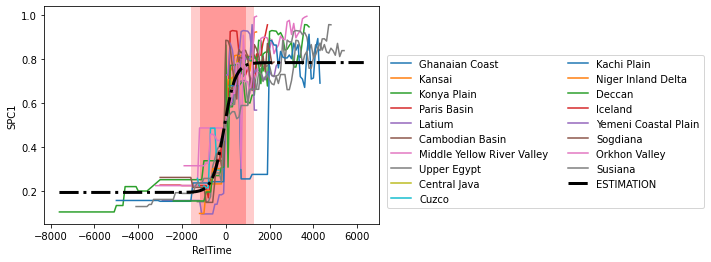

In [55]:
DF_Out = pd.DataFrame(columns=["NGA","RelTime","SPC1"])
DF_CC_Out = pd.DataFrame(columns =["NGA","RelTime","SPC1", "PolPop", "PolTerr",   "CapPop", "levels",
                         "government",  "infrastr", "writing", "texts", "money"])

for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    DF_CC_Out = pd.concat((DF_CC_Out, DF[DF_CC_Out.columns]))
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#plt.savefig("SPC1_Time_Interval")
plt.show()

In [56]:
print(T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled)

-1577.0521691717543 -1195.6524210140826 905.9823432559963 1267.4833898235086


In [57]:
DF_Out.index=np.arange(0, DF_Out.shape[0])
DF_Out.to_csv("RelTime_TimeSeries_SPC1.csv")
DF_CC_Out.index = DF_Out.index

In [58]:
Timeframes = np.array([T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled])

In [59]:
#np.savetxt("Parameters_and_Times.txt",np.concatenate((p0, Timeframes)))

In [60]:
DF_CC_Out.to_csv("RelTime_TimeSeries_CC.csv")

In [61]:
DF_CC_Out

,NGA,RelTime,SPC1,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money
0,Ghanaian Coast,-200,0.419548,6.020137,1.769219,4.519068,4.000000,0.172727,0.325000,0.333333,0.0000,3.000000
1,Ghanaian Coast,-100,0.419548,6.020137,1.769219,4.519068,4.000000,0.172727,0.325000,0.333333,0.0000,3.000000
2,Ghanaian Coast,0,0.623384,6.599660,5.796741,4.130334,5.333333,0.454545,0.408333,1.000000,0.3750,3.000000
3,Kansai,-700,0.232953,3.344740,0.000000,3.125395,2.158344,0.144444,0.366667,0.150000,0.0000,4.000000
4,Kansai,-600,0.232953,3.344740,0.000000,3.125395,2.158344,0.144444,0.366667,0.150000,0.0000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
766,Susiana,5000,0.818716,6.720159,6.579784,5.160659,5.501420,0.709091,0.987500,0.828571,1.0000,2.934952
767,Susiana,5100,0.872746,7.690196,6.740363,5.176091,6.115642,0.827273,0.881818,0.828571,0.9875,5.000000
768,Susiana,5200,0.812770,6.766649,6.255273,4.880255,5.092885,0.744444,0.850000,0.828571,0.9625,5.000000
769,Susiana,5300,0.839888,6.954243,6.431364,5.301030,5.530021,0.809091,0.825000,0.842857,1.0000,5.000000


### Dan's Questions

Do large NGAs reach the SPC1 threshold again after a decline? And are the NGAs that never reach the threshold too young (i.e. did not have enough time to develop)?

In [82]:
Lengths_Small = []
for i in SmallNGAs:
    #print(i)
   # print(Data[Data["NGA"]==i][["NGA", "Time","SPC1"]])
    df_i = Data[Data["NGA"]==i][["NGA", "Time","SPC1"]]
    #print(len(df_i["Time"]))
    Lengths_Small.append(len(df_i["Time"]))
print(" ##################### ")
print("For the low-SPC1 NGAs, the mean length of their time series is",np.mean(Lengths_Small), u"\u00B1",
      np.round(np.std(Lengths_Small),1),"data points and the median is",
     np.median(Lengths_Small), "data points.")

 ##################### 
For the low-SPC1 NGAs, the mean length of their time series is 7.75 ± 9.4 data points and the median is 3.0 data points.


In [84]:
Lengths_Large = []
for i in LargeNGAs:
    #print(i)
   # print(Data[Data["NGA"]==i][["NGA", "Time","SPC1"]])
    df_i = Data[Data["NGA"]==i][["NGA", "Time","SPC1"]]
    #print(len(df_i["Time"]))
    Lengths_Large.append(len(df_i["Time"]))
print(" ##################### ")

print("For the high-SPC1 NGAs, the mean length of their time series is",np.round(np.mean(Lengths_Large),1), u"\u00B1",
      np.round(np.std(Lengths_Large),1),"data points and the median is",
     np.median(Lengths_Large), "data points.")

 ##################### 
For the high-SPC1 NGAs, the mean length of their time series is 42.8 ± 32.4 data points and the median is 38.5 data points.


Indeed, the low-SPC1 NGAs have very short "life times" and their development may simply have been prematurely ended by an outside influence (e.g. conquest).

#### Do they reach SPC1 threshold a second time?

In [91]:
DF_second_time = DF_CC_Out[["NGA", "RelTime", "SPC1"]]
DF_second_time = DF_second_time[DF_second_time["RelTime"]>-1] # look only at data after the first threshold


In [96]:
np.float64(SPC_Break)

0.49

In [98]:
DF_second_time.loc[DF_second_time["SPC1"] < np.float64(SPC_Break)]

,NGA,RelTime,SPC1
469,Kachi Plain,700,0.255631
470,Kachi Plain,800,0.255631
471,Kachi Plain,900,0.255631
472,Kachi Plain,1000,0.255631
473,Kachi Plain,1100,0.255631
474,Kachi Plain,1200,0.276092
475,Kachi Plain,1300,0.276092
476,Kachi Plain,1400,0.276092
477,Kachi Plain,1500,0.276092
478,Kachi Plain,1600,0.276092
